In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn import metrics

%matplotlib inline

# Load the Data

In [4]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_dataset_A.csv")

In [6]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


# Preprocess the Data

In [9]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

# Keeping the original 'position' column intact for further encoding steps

In [11]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0


In [13]:
# Split all features into categorical and numeric
categorical_features = ['team','position']
numeric_features = ['height' , 'age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','winger']

In [15]:
# Loop through all categorical features and print the value counts for each
for i in categorical_features:
    print (df[i].value_counts())

team
Al-Batin FC             35
Swallows FC             35
Maritzburg United FC    35
Incheon United          34
FC Seoul                34
                        ..
Crystal Palace           2
Villarreal CF            2
Inter Milan              2
FC Barcelona             2
Leicester City           2
Name: count, Length: 356, dtype: int64
position
Defender Centre-Back          1061
Goalkeeper                     788
midfield-CentralMidfield       603
midfield-DefensiveMidfield     539
Defender Right-Back            524
Defender Left-Back             498
Attack Centre-Forward          456
midfield-AttackingMidfield     351
Attack-RightWinger             346
Attack-LeftWinger              299
midfield-RightMidfield          61
midfield-LeftMidfield           58
midfield                        57
Attack                          38
Defender                        30
Attack-SecondStriker            26
Name: count, dtype: int64


In [17]:
# Get the counts of each category in 'team'
team_counts = df['team'].value_counts()  
# Keep only rows where the 'team' count is greater than or equal to 2
df = df[df['team'].isin(team_counts[team_counts >= 2].index)]  

In [19]:
# one hot encoding for categorical_features
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [21]:
df.shape

(5735, 387)

In [23]:
# Define a threshold for binary classification by using the median
threshold = df['current_value'].median()

# Function to categorize into binary classes: Low or High
def categorize_values_binary(value):
    if value <= threshold:
        return 'Low'
    else:
        return 'High'

# Apply the function to create a new binary classification column
df['current_value_category'] = df['current_value'].apply(categorize_values_binary)

# Drop the original 'current_value' column as it's no longer needed
df.drop('current_value', axis=1, inplace=True)

# Check the distribution of the new binary categories
print(df['current_value_category'].value_counts())

current_value_category
Low     3112
High    2623
Name: count, dtype: int64


In [29]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category']) 

In [33]:
df.drop('current_value_category', axis=1, inplace=True)

# Feature selection

In [36]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
position_Goalkeeper               0.165113
goals conceded                    0.115830
position_midfield                 0.091985
team_Richards Bay FC              0.062908
                                    ...   
games_injured                    -0.189400
assists                          -0.240275
minutes played                   -0.383475
appearance                       -0.390704
highest_value                    -0.628608
Name: current_value_category_encoded, Length: 387, dtype: float64


In [38]:
threshold = 0.10 

selected_features = correlation[abs(correlation['current_value_category_encoded']) > threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Goalkeeper', 'current_value_category_encoded'],
      dtype='object')

In [40]:
selected_features = ['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Goalkeeper', 'current_value_category_encoded']

In [42]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper,current_value_category_encoded
0,34,0.000000,0.000000,0.000000,2758,47,13,0,2000000,False,0
1,39,0.129125,0.064562,0.000000,2788,0,0,1,800000,False,0
2,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,False,0
3,65,0.000000,0.000000,1.257883,5867,0,0,0,2000000,True,0
4,31,0.000000,0.000000,1.483871,2790,89,14,0,3500000,True,0


In [44]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']


# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model

In [46]:
model = LogisticRegression(random_state=42)

# Train the model

In [49]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Test the model

In [52]:
y_pred = model.predict(X_test_scaled)

# Interpretation of the Model

In [71]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[0],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,0.433721
goals,-0.078697
assists,-0.173060
goals conceded,0.047540
minutes played,-0.883973
days_injured,0.213911
games_injured,-0.088011
award,0.025962
highest_value,-2.861463
position_Goalkeeper,0.198267


In [73]:
model.coef_

array([[ 0.43372105, -0.07869661, -0.17305955,  0.04754014, -0.88397315,
         0.21391113, -0.08801094,  0.02596155, -2.86146327,  0.19826735]])

In [75]:
print(model.intercept_) 

[-0.37550492]


# Evaluating the Model 

In [79]:
# our benchmark model
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

54.26

In [81]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8430688753269399

In [109]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8517872711421098

In [111]:
# The model performs well, with similar scores on both the training and test sets.

In [87]:
precision = precision_score(y_test, y_pred, average='micro')
precision

0.8430688753269399

In [89]:
# Using precision to evaluate the accuracy of positive predictions.
# average='micro' used here for multi-class classification to compute metrics globally across all classes.

In [91]:
recall = recall_score(y_test, y_pred, average='micro')
recall

0.8430688753269399

In [93]:
# Using recall to evaluate the model's ability to correctly identify positive instances.
# average='micro' used here for multi-class classification to compute metrics globally across all classes.

In [95]:
F1 = f1_score(y_test, y_pred, average='micro')
F1

0.8430688753269399

In [97]:
# Using F1 score to evaluate the balance between precision and recall for positive predictions.
# average='micro' used here for multi-class classification to compute metrics globally across all classes.

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[398, 122],
       [ 58, 569]], dtype=int64)

In [101]:
# These are the misclassifications. For instance:
#62 instances of class 0 were misclassified as class 1.
#107 instances of class 1 were misclassified as class 0.
#58 instances of class 2 were misclassified as class 1, and so on.

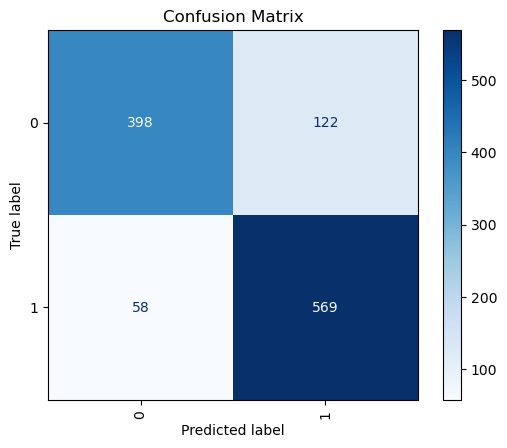

In [103]:
# Heatmap for the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       520
           1       0.82      0.91      0.86       627

    accuracy                           0.84      1147
   macro avg       0.85      0.84      0.84      1147
weighted avg       0.85      0.84      0.84      1147

